# <p style="text-align: center;">The Plotly Library</p>
### <p style="text-align: center;">by Hunter LaValley</p>

In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# <p style="text-align: center;"> Dataframes</p>


In [2]:
ygo = pd.read_excel('yugioh.xlsx') #Yu-Gi-oh Forbidden Memories monsters by type and attack
ygo2 = pd.read_excel('ygo2.xlsx') #YFM Monsters by Type, Attack and Defense
stars1 = pd.read_excel('brighteststars.xlsx') #Brightest stars
stars2 = pd.read_excel('neareststars.xlsx') #Nearest stars
cosmo = pd.read_excel('cosmologicaldata.xlsx') #Solar system data
simpsons = pd.read_excel('simpsons.xlsx') #Vehicle data from The Simpsons: Hit and Run for PS2
ctr = pd.read_excel('ctr.xlsx') #Character data for Crash Team Racing: Nitro-Fueled
btd1 = pd.read_excel('btd1.xlsx') #Round data for Bloons Tower Defense 1 
btd3 = pd.read_excel('btd3.xlsx') #Round data for Bloons Tower Defense 3
btd4 = pd.read_excel('btd4.xlsx') #Round data for Bloons Tower Defense 4
bloons = pd.read_excel('allbloons.xlsx') #Compilation of df's from btd1, 3 and 4
rs = pd.read_excel('runescape.xlsx') #My runescape skills and xp as of 06/20/2022
dfs = {'ygo': 'Type, Mean/Max Attack', 
       'ygo2': 'Type, Attack, Defense', 
       'stars1': 'brightest stars', 
       'stars2': 'nearest stars', 
       'cosmo': 'solar system data', 
       'simpsons': 'simpsons hit and run data', 
       'ctr': 'car stats', 
       'btd1': 'round stats', 
       'btd3': 'round stats', 
       'btd4': 'round stats', 
       'rs': 'xp, rank, level'} 

In [3]:
btd4

,Round,Red Bloon Equivalent,Max. Money Awarded for Popping,Total Money Awarded,Cumulative Money Awarded
0,1,14,14,114,114
1,2,30,30,131,245
2,3,30,30,132,377
3,4,60,60,163,540
4,5,45,45,149,689
...,...,...,...,...,...
70,71,9210,6660,6830,148887
71,72,6326,3080,3251,152138
72,73,7476,4236,4408,156546
73,74,23748,20525,20698,177244


# <p style="text-align: center;">Basic Plotly - Old Fashioned Plotly </p>


<AxesSubplot:>

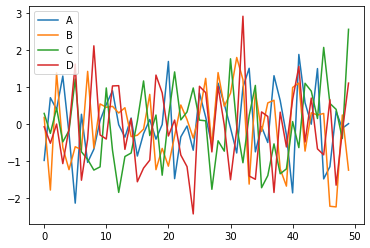

In [4]:
arr_1 = np.random.randn(50,4)
df_1 = pd.DataFrame(arr_1, columns = ['A', 'B', 'C', 'D'])
df_1.head()
df_1.plot() #Old way of doing it

In [5]:
df_1.iplot() #The new and improved way of doing it, one line using iplot.

# <p style="text-align: center;"> Line Plots</p>


In [27]:
import plotly.graph_objects as go
simpsons = pd.read_excel('simpsons.xlsx')
px.line(simpsons, x = 'Vehicle', y = 'Speed', labels = {'x':'Vehicles', 'y':'Speed Ranks'})
#This is a little more interesting if you know that the x-axis contains cars in order
#of increasing level as well, so the speed correlates with progress in the game which is to be expected.


# <p style="text-align: center;"> Comparing Bloons Tower Defense 3 and 4 </p>


In [7]:
px.line(bloons, x = 'Round', y = ['Red Bloon Equivalent (1)', 
                                  'Red Bloon Equivalent (3)', 
                                  'Red Bloon Equivalent (4)'],
               title = 'Number of Bloons Popped in 50 Rounds for BTD1, 3 & 4')

#It makes sense that as the games progressed they got a lot harder
#3 and 4 have roughly the same final level
#All 3 seems to crawl until about level 35-40 where everything shoots up

In [8]:
#Pulling individual columns of data from the data set and using markers 
fig = go.Figure()
fig.add_trace(go.Scatter(x=bloons.Round, y = bloons['Red Bloon Equivalent (1)'],
             mode = 'lines+markers', name = 'BTD1',
                        line = dict(color='darkviolet', width = 2,
                                   dash = 'dot')))
fig.add_trace(go.Scatter(x=bloons.Round, y = bloons['Red Bloon Equivalent (3)'],
             mode = 'lines+markers', name = 'BTD3',
                        line = dict(color='dodgerblue', width = 2,
                                   dash = 'dash')))
fig.add_trace(go.Scatter(x=bloons.Round, y = bloons['Red Bloon Equivalent (4)'],
             mode = 'lines+markers', name = 'BTD4',
                        line = dict(color='lawngreen', width = 2,
                                   dash = 'dashdot')))

fig.update_layout(title = 'Number of Bloons Popped in 50 Rounds for BTD1, 3 & 4', xaxis_title = 'Round', yaxis_title = 'Number of Bloons Popped')
fig.update_layout( 
xaxis = dict( 
showline = True, showgrid = True, showticklabels = True, 
linecolor= 'rgb(204, 204, 204)',
linewidth = 2, ticks = 'outside', tickfont = dict(
family = 'Arial', size = 12, color = 'rgb(82, 82, 82)',
),
),
yaxis = dict(showgrid = True, zeroline = False, showline = False,
            showticklabels = True),
autosize = False,
margin = dict(
autoexpand = True, l = 100, r = 20, t = 110, ),
showlegend = True, plot_bgcolor = 'white')

# <p style="text-align: center;">Bar Chart </p>


In [9]:
stars1

,Name,Apparent_Visual_Magnitude,Absolute_Magnitude,Distance_(Light-years),Radial_Velocity_(km/s)
0,Sirius,-1.46,1.4,8.8,8
1,Canopus,-0.72,-8.5,1200.0,21
2,Arcturus,-0.04,-0.2,36.0,5
3,Rigil_Kentaurus,0.00,4.4,4.2,25
4,Vega,0.03,0.3,26.0,14
5,Capella,0.08,-0.6,4.2,30
6,Rigel,0.12,-7.1,910.0,21
7,Procyon,0.38,2.6,11.0,3
8,Achernar,0.46,-1.6,85.0,19
9,Betelgeuse,0.50,-5.6,310.0,21


In [10]:
px.bar(stars1, x='Name', y = 'Distance_(Light-years)', title = 'Distance to the Brightest Stars from Earth')

In [11]:
simpsons

,Vehicle,Speed,Acceleration,Toughness,Handling,Level,Cost (Coins)
0,Cletus'_Pickup_Truck,1.0,1.0,3.5,2.5,1,0
1,Duff_Truck,0.5,0.5,4.0,1.0,1,125
2,Electaurus,2.0,1.5,1.5,4.0,1,0
3,Family_Sedan,1.0,1.5,2.5,4.0,1,0
4,Plow_King,1.5,0.5,5.0,1.5,1,150
5,Surveillance_Van,1.5,1.5,3.5,3.0,1,100
6,Fire_Truck,3.0,0.5,5.0,1.0,2,250
7,Grampa's_WWII_Vehicle,1.5,1.5,3.5,3.0,2,0
8,Honor_Rollor,1.5,2.0,1.5,5.0,2,0
9,Limo,1.5,1.5,3.5,2.5,2,150


In [42]:
px.bar?

In [36]:
px.bar(simpsons, x = 'Speed', y = 'Acceleration', color = 'Level',  
       title = 'Speed and Acceleration of Vehicles by Level in "The Simpsons: Hit and Run"',
        hover_name='Vehicle')

In [13]:
ygo2

,Name,Type,Level,Attack,Defense
0,Blue-eyes Ultimate Dragon,Dragon,12,4500,3800
1,Gate Guardian,Warrior,11,3750,3400
2,Perfectly Ultimate Great Moth,Insect,8,3500,3000
3,B. Skull Dragon,Dragon,9,3200,2500
4,Blue-eyes White Dragon,Dragon,8,3000,2500
...,...,...,...,...,...
595,Gruesome Goo,Aqua,3,1300,700
596,Hyosube,Aqua,4,1500,900
597,Machine Attacker,Machine,5,1600,1300
598,Hibikime,Warrior,4,1450,1000


In [14]:
#population data for countries in europe in 2007 greater than 2 million people
fig = px.bar(ygo2, y = 'Attack', x = 'Type', text = 'Attack', color = 'Name', 
             title = 'Every Monster in Yu-Gi-Oh: Forbidden Memories Ranked by Type and Attack')

##Putting population above the bar instead of inside
fig.update_traces(texttemplate= '%{text:.2s}', textposition = 'outside')
fig.update_layout(uniformtext_minsize = 8)
fig.update_layout(xaxis_tickangle = -45)

'''The y-axis looks a little strange if you play Yu-Gi-oh but it makes sense:
It is telling you the cumulative attack in that monster type.
It should make sense right away that Pyro is the smallest and Warrior is largest.

Moreover, the biggest value is on the bottom
so think about it like the strongest monster hold the stack up.'''

fig

Pie Charts

In [48]:
#This is just to compare how plotly would plot the same data I plotted in the Matplotlib notebook
#See below for the Matplotlib version!
colors = ['blue', 'green', 'black', 'purple', 'red', 'brown']


fig= go.Figure(data=[go.Pie(labels=
                            ['Aqua','Beast','Beast-Warrior','Dinosaur',
                             'Dragon','Fairy','Fiend','Fish',
                             'Insect','Machine','Plant','Pyro',
                             'Reptile','Rock','Sea Serpent','Spellcaster',
                             'Thunder','Warrior','Winged Beast','Zombie'],
                            
                           values = [61, 41, 14, 13, 
                                     32, 26, 69, 17, 
                                     36, 43, 22, 9,
                                     12, 22, 5, 57, 
                                     14, 74, 23, 31])])
fig.update_traces(hoverinfo = 'label+percent', textfont_size = 15, 
                 textinfo = 'label+percent',
                 pull = [0,0,0,0,
                         0,0,0.1,0,
                         0,0,0,0,
                         0,0,0,0,
                         0,0.1,0,0,],
                 marker = dict(colors = colors, line = dict(color = 'white',
                                                           width = 2)))

>Compare the Plotly pie chart with the Matplotlib pie chart with the same data:

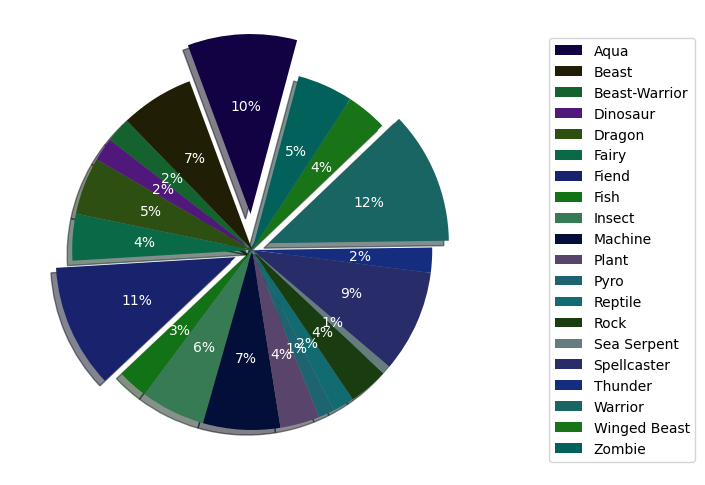

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
''':::Creating a pie chart of the number of Yugioh Monster Cards from Yu-Gi-Oh Forbidden Memories, my favorite game:::'''
import random

fig = plt.figure(figsize=(8,5),dpi=100)
axes = fig.add_axes([0.1,0.1,0.9,0.9])

types = ['Aqua','Beast','Beast-Warrior','Dinosaur', #Writing 4 items per row to make keeping track more simple
         'Dragon','Fairy','Fiend','Fish',
         'Insect','Machine','Plant','Pyro',
         'Reptile','Rock','Sea Serpent','Spellcaster',
         'Thunder','Warrior','Winged Beast','Zombie']
frequency = [61, 41, 14, 13, #Again, 4 items per row to make it easier to spot mistakes
            32, 26, 69, 17, 
            36, 43, 22, 9,
            12, 22, 5, 57, 
            14, 74, 23, 31 ]

# Generating a random color array, every time you rerun the cell it turns out a different pattern
colors = []
for i in range(20):
    rgb = (random.uniform(0, .5), random.uniform(0, .5), random.uniform(0, .5))
    colors.append(rgb)
    
# Exploding the 3 biggest slices
explode = [0,0,0,0,
          0,0,0.1,0,
          0,0,0,0,
          0,0,0,0,
          0,0.1,0,0,]
explode[0] = 0.2

# Provide values, what to explode and by how much, 
#labels
#colors
#pct for percent values,
# Choose whether you want a shadow, how to rotate the pie, and the text color
wedges, texts, autotexts = plt.pie(frequency, explode=explode, labels=types, colors=colors, 
                                   autopct='%1.0f%%', shadow=True, startangle=75, 
                                   textprops=dict(color="w"))
# Create legend to right and move off pie with 1-1.5 axes point width
plt.legend(wedges, types, loc='right', bbox_to_anchor=(1,0, 0.5, 1))

# <p style="text-align: center;"> Histograms</p>

In [50]:
dice_1 = np.random.randint(1,7,300)
dice_2 = np.random.randint(1,7,300)
dice_sum = dice_1 + dice_2
fig = px.histogram(dice_sum, nbins = 11, 
                   labels = {'value': 'Dice Roll'},
                  title = '300 Dice Roll Histogram',
                  marginal = 'violin', 
                  color_discrete_sequence = ['purple'])
fig.update_layout(
xaxis_title_text = 'Dice Roll',
yaxis_title_text = 'Dice Sum', 
showlegend = False)

In [51]:
df_tips = px.data.tips()
px.histogram(df_tips, x = 'total_bill', color = 'sex')

# <p style="text-align: center;">Box Plots </p>

In [52]:
px.box(df_tips, x = 'sex', y = 'tip', points = 'all')
px.box(df_tips, x = 'day', y = 'tip', color = 'sex')

fig = go.Figure()
fig.add_trace(go.Box(x = df_tips.sex, y = df_tips.tip, marker_color = 'blue',
                    boxmean = 'sd'))

In [53]:
df_stocks = px.data.stocks()
fig = go.Figure()
fig.add_trace(go.Box(y = df_stocks.GOOG, boxpoints = 'all',
                    fillcolor = 'blue', jitter = 0.5,
                    whiskerwidth = 0.2))
fig.add_trace(go.Box(y = df_stocks.AAPL, boxpoints = 'all',
                    fillcolor = 'red', jitter = 0.5,
                    whiskerwidth = 0.2))

fig.update_layout(title = 'Google vs. Apple', 
                 yaxis = dict (gridcolor = 'rgb(255, 255, 255)',
                              gridwidth = 3),
                 paper_bgcolor = 'rgb(243, 243, 243)',
                 plot_bgcolor = 'rgb(243, 243, 243)')

# <p style="text-align: center;">Violin Plots  </p>

In [21]:
df_tips = px.data.tips()
px.violin(df_tips, y = 'total_bill', box = True, points = 'all')

px.violin(df_tips, y = 'tip', x = 'smoker', color = 'sex', box = True,
         points = 'all', hover_data = df_tips.columns)

##Let's morph the left and right sides based on a boolean, whether or not the customer smoked

fig = go.Figure()
fig.add_trace(go.Violin(x = df_tips['day'][df_tips['smoker'] == 'Yes'],
                       y = df_tips['total_bill'][df_tips['smoker'] == 'Yes'],
                       legendgroup = 'Yes', scalegroup = 'Yes', name = 'Yes',
                       side = 'negative', line_color = 'blue'))

fig.add_trace(go.Violin(x = df_tips['day'][df_tips['smoker'] == 'No'],
                       y = df_tips['total_bill'][df_tips['smoker'] == 'No'],
                       legendgroup = 'Yes', scalegroup = 'Yes', name = 'No',
                       side = 'positive', line_color = 'red'))

In [22]:
df_tips = px.data.tips()
px.violin(df_tips, y = 'total_bill', box = True, points = 'all')

px.violin(df_tips, y = 'tip', x = 'smoker', color = 'sex', box = True,
         points = 'all', hover_data = df_tips.columns)

##Let's morph the left and right sides based on a boolean, whether or not the customer smoked

fig = go.Figure()
fig.add_trace(go.Violin(x = df_tips['day'][df_tips['smoker'] == 'Yes'],
                       y = df_tips['total_bill'][df_tips['smoker'] == 'Yes'],
                       legendgroup = 'Yes', scalegroup = 'Yes', name = 'Yes',
                       side = 'negative', line_color = 'blue'))

fig.add_trace(go.Violin(x = df_tips['day'][df_tips['smoker'] == 'No'],
                       y = df_tips['total_bill'][df_tips['smoker'] == 'No'],
                       legendgroup = 'Yes', scalegroup = 'Yes', name = 'No',
                       side = 'positive', line_color = 'red'))

# <p style="text-align: center;"> 3D Scatter Plots</p>

In [23]:
flights = sns.load_dataset("flights")
fig = px.scatter_3d(flights, x = 'year', y = 'month', z = 'passengers', 
                   color = 'year', opacity = 0.7)
fig

In [24]:
fig = px.line_3d(flights, x = 'year', y = 'month', z = 'passengers', 
                   color = 'year')
fig

# <p style="text-align: center;">Scatter Matrix  </p>

In [59]:
fig = px.scatter_matrix(flights, color = 'month')
fig

# <p style="text-align: center;"> Plotting on the Globe</p>

In [58]:
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations = 'iso_alpha',
                    color='continent', 
                    hover_name = 'country',
                    size = 'pop',
                    projection = 'orthographic')
fig